In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
from mplsoccer import PyPizza, add_image, FontManager
from highlight_text import fig_text
import requests

In [127]:
league_id = 46
season_id = 20962
league = 'superligaen'

In [128]:
df = pd.DataFrame()

In [129]:
for x in range(1):
    params ={
    'id':f'{league_id}',
    'season':f'{season_id}',
    'type':'teams',
    'stat':f'{stats_list[x]}',
    'slug':f'{league}-teams',
    }
    response = requests.get('https://www.fotmob.com/api/leagueseasondeepstats',params=params)
    data = response.json()
    df_temp = pd.DataFrame(data['statsData'])
    for y in range(len(df_temp)):
        df_temp['statValue'][y] = df_temp['statValue'][y]['value']
    df_temp = df_temp.drop(columns=['id','teamId','substatValue','rank','type'])
    stat_name = data['statsList'][x]['title']
    df_temp.rename(columns={'statValue':stat_name},inplace=True)
    df = pd.concat([df,df_temp],axis=1)

C:\Users\dmsta\AppData\Local\Temp\ipykernel_17576\43596348.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['statValue'][y] = df_temp['statValue'][y]['value']
C:\Users\dmsta\AppData\Local\Temp\ipykernel_17576\43596348.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['statValue'][y] = df_temp['statValue'][y]['value']
C:\Users\dmsta\AppData\Local\Temp\ipykernel_17576\43596348.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [130]:
df

,name,Accurate crosses per match
0,FC København,5.9
1,Lyngby,5.2
2,Brøndby IF,5
3,Nordsjælland,4.4
4,Viborg,4.4
5,Midtjylland,4.2
6,AGF Aarhus,4.2
7,Hvidovre,4
8,Vejle Boldklub,3.8
9,Odense,3.8


In [131]:
for x in range(1,len(data['statsList'])):
    params ={
    'id':f'{league_id}',
    'season':f'{season_id}',
    'type':'teams',
    'stat':f'{stats_list[x]}',
    'slug':f'{league}-teams',
    }
    response = requests.get('https://www.fotmob.com/api/leagueseasondeepstats',params=params)
    data = response.json()
    df_temp = pd.DataFrame(data['statsData'])
    for y in range(len(df_temp)):
        df_temp['statValue'][y] = df_temp['statValue'][y]['value']
    df_temp = df_temp.drop(columns=['id','teamId','substatValue','rank','type'])
    stat_name = data['statsList'][x]['title']
    df_temp.rename(columns={'statValue':stat_name},inplace=True)
    df = pd.merge(df,df_temp,how='outer',on='name')
df.fillna(0,inplace=True)

C:\Users\dmsta\AppData\Local\Temp\ipykernel_17576\1519737498.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['statValue'][y] = df_temp['statValue'][y]['value']
C:\Users\dmsta\AppData\Local\Temp\ipykernel_17576\1519737498.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['statValue'][y] = df_temp['statValue'][y]['value']
C:\Users\dmsta\AppData\Local\Temp\ipykernel_17576\1519737498.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [ ]:
for x in df.columns[1:]:
    df[x] = df[x].astype(float)

In [ ]:
#change depending on league
for x in df.columns[1:]:
    if 'per match' in x:
        df[x] = df[x]
    elif 'Average' in x:
        df[x] = df[x]
    else: 
        df[x] = df[x]/32

In [ ]:
g

In [ ]:
params = list(df.columns)
params = params[1:]
params

['Headed Shots (%)',
 'Long Balls (%)',
 'Opposition Third Touches (%)',
 'Aerial Duels Won',
 'Right Sided Attacks (%)',
 'Shots from Middle (%)',
 'Shots in Box (%)',
 'Own Third Touches (%)',
 'Possession',
 'Pass Completion',
 'Short Passes (%)']

In [ ]:
sutton = df.loc[df['Team'] == 'Sutton United'].reset_index()

In [ ]:
sutton

,index,Team,Headed Shots (%),Long Balls (%),Opposition Third Touches (%),Aerial Duels Won,Right Sided Attacks (%),Shots from Middle (%),Shots in Box (%),Own Third Touches (%),Possession,Pass Completion,Short Passes (%)
0,19,Sutton United,27,25,35,32.3,40,74,68,27,43.6,62.0,74


In [ ]:
sutton = list(sutton.loc[0])

In [ ]:
sutton = sutton[2:]

In [ ]:
sutton

[27, 25, 35, 32.3, 40, 74, 68, 27, 43.6, 62.0, 74]

In [ ]:
average_values = []
for x in range(len(params)):
    average_values.append(df[params[x]].mean().astype(int))
min_values = []
for x in range(len(params)):
    min_values.append(df[params[x]].min()-2)
max_values = []
for x in range(len(params)):
    max_values.append(df[params[x]].max())

In [ ]:
min_values[7] = min_values[7] + 1

In [ ]:
average_values

[17, 18, 30, 24, 38, 67, 64, 30, 49, 71, 80]

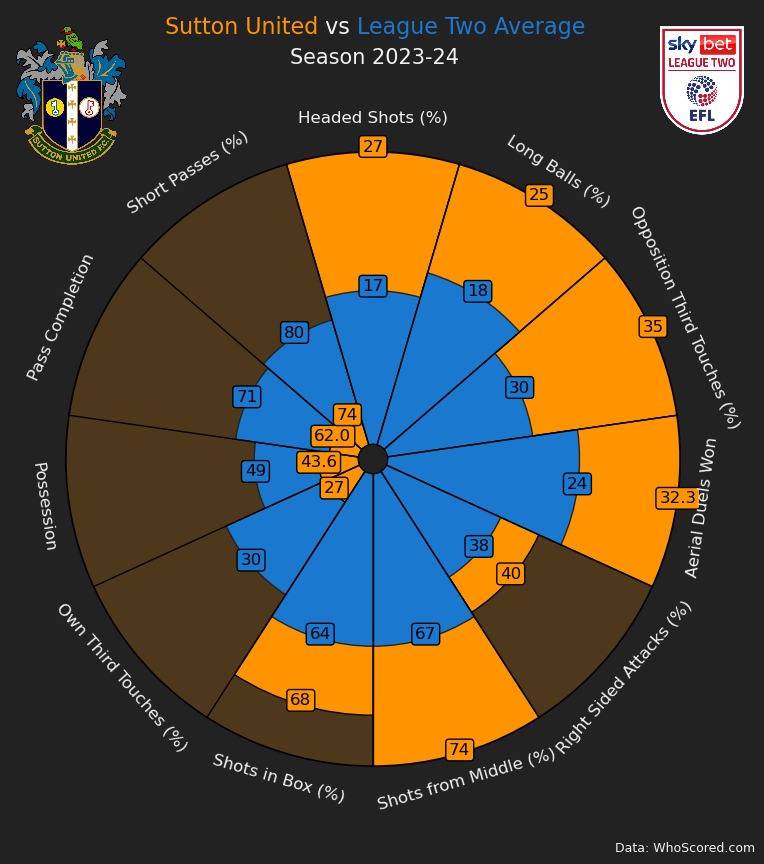

In [ ]:
# parameter and value list
# The values are taken from the excellent fbref website (supplied by StatsBomb)

values = sutton    # Putellas
values_2 = average_values  # League Average

# minimum range value and maximum range value for parameters
min_range = min_values
max_range = max_values

# instantiate PyPizza class
baker = PyPizza(
    params=params,
    min_range=min_range,        # min range values
    max_range=max_range,        # max range values
    background_color="#222222", straight_line_color="#000000",
    last_circle_color="#000000", last_circle_lw=2.5, other_circle_lw=0,
    other_circle_color="#000000", straight_line_lw=1
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                     # list of values
    compare_values=values_2,    # passing comparison values
    figsize=(8, 8),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.2,            # alpha for blank-space colors
    param_location=110,         # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#ff9300", edgecolor="#000000",
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_compare=dict(
        facecolor="#1A78CF", edgecolor="#222222", zorder=3, linewidth=1,
    ),                          # values to be used when plotting comparison slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=12, zorder=5,
        #fontproperties=font_normal.prop, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        #fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#FF9300",
            boxstyle="round,pad=0.2", lw=1
        )
    ),                           # values to be used when adding parameter-values
    kwargs_compare_values=dict(
        color="#000000", fontsize=12,
        #fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#1A78CF",
            boxstyle="round,pad=0.2", lw=1
        )
    )                            # values to be used when adding comparison-values
)

# add title
fig_text(
    0.515, 1.05, "<Sutton United> vs <League Two Average>",
    size=16, fig=fig,
    highlight_textprops=[{"color": '#FF9300'}, {"color": '#1A78CF'}],
    ha="center", color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.99,
    "Season 2023-24",
    size=15,
    ha="center", color="#F2F2F2"
)

# add credits
CREDIT_1 = "Data: WhoScored.com"

fig.text(
    0.99, 0.005, f"{CREDIT_1}", size=9,
    color="#F2F2F2",
    ha="right"
)
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib as mpl
logo_image = plt.imread("C:\\Users\\George\\Documents\\Football Analytics\\Images\\League Two_Logo.png")

# Create an OffsetImage instance with the loaded image
logo_offsetimage = OffsetImage(logo_image, zoom=0.25)  # Adjust the zoom value as needed

# Create an AnnotationBbox instance and add it to the plot
logo_box = AnnotationBbox(logo_offsetimage, (1.1, 1.2), xycoords='axes fraction', box_alignment=(1.0, 1.0), boxcoords="offset pixels")
ax = plt.gca()
ax.add_artist(logo_box)
logo_box.patch.set_alpha(0)
logo_image2 = plt.imread("C:\\Users\\George\\Documents\\Football Analytics\\Team Logos\\sutton_logo.png")

# Create an OffsetImage instance with the loaded image
logo_offsetimage2 = OffsetImage(logo_image2, zoom=0.1)  # Adjust the zoom value as needed

# Create an AnnotationBbox instance and add it to the plot
logo_box2 = AnnotationBbox(logo_offsetimage2, (0.1, 1.2), xycoords='axes fraction', box_alignment=(1.0, 1.0), boxcoords="offset pixels")
ax = plt.gca()
ax.add_artist(logo_box2)
logo_box2.patch.set_alpha(0)
plt.show()

In [ ]:
fig.savefig(
    f"C:/Users/George/Documents/Football Analytics/Sutton Report/Sutton Strengths and Weaknesses.png",
    facecolor=ax.get_facecolor(),
    dpi=200,
    bbox_inches="tight"
)